## Introduction to Matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[]

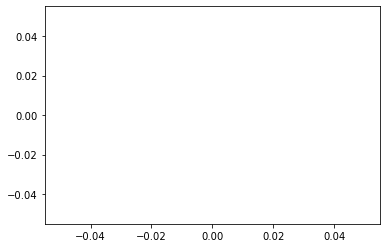

In [4]:
plt.plot()

In [11]:
plt.style.available
plt.style.use('seaborn-whitegrid')

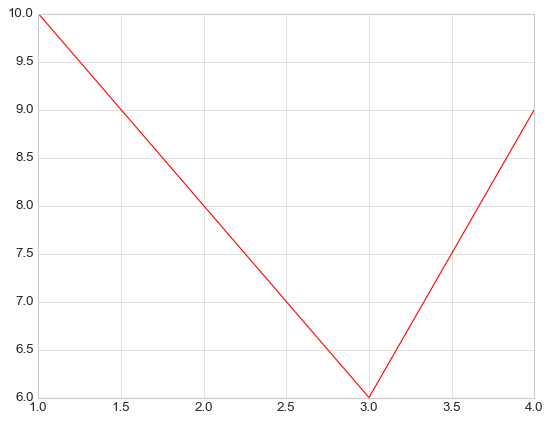

In [12]:
x = [1, 2, 3, 4]
y = [10, 8, 6, 9]
plt.plot(x, y, color="r")

### Pyplot API vs Object-Oriented (OO) API
* Pyplot API -> Quickly
* OO API -> Advanced

## Pyplot API

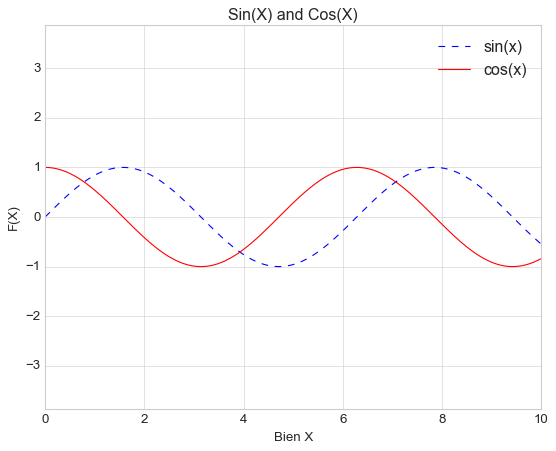

In [29]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), color="blue", linestyle="dashed", label="sin(x)");
plt.plot(x, np.cos(x), color="red", label="cos(x)")

plt.title("Sin(X) and Cos(X)")
plt.xlabel("Bien X");
plt.ylabel("F(X)");

# plt.xlim([0,4])
# plt.ylim([-0.75,0.75])
# plt.axis([xmin, xmax, ymin, ymax])
# plt.axis([0, 4, -0.7, 0.6])
# plt.axis("tight")
plt.axis("equal")

plt.legend();

## Object-Oriented API

[Text(0.5, 1.0, 'A simple plot'),
 Text(0.5, 0, 'x-axis'),
 Text(0, 0.5, 'y-axis')]

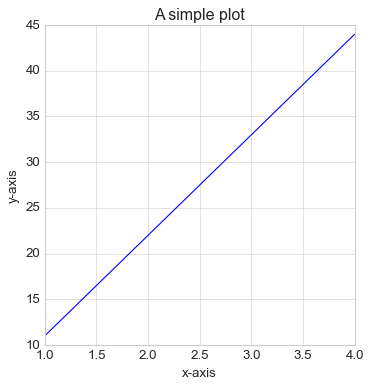

In [34]:
#1. Prepare Data
x = [1,2,3,4]
y = [11,22,33,44]

#2. Set up Plot
fig, ax = plt.subplots(figsize=(5,5)) #Figure size = Width & Height of the plot

#3. Plot the data
ax.plot(x, y);

ax.set(title="A simple plot",
       xlabel="x-axis",
       ylabel="y-axis")

## 2. Most common types of Matplotlib plots
* line
* scatter
* bar
* hist
* subplot()

In [36]:
# Create an array
x = np.linspace(0, 10, 100)
x[:5]

array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])

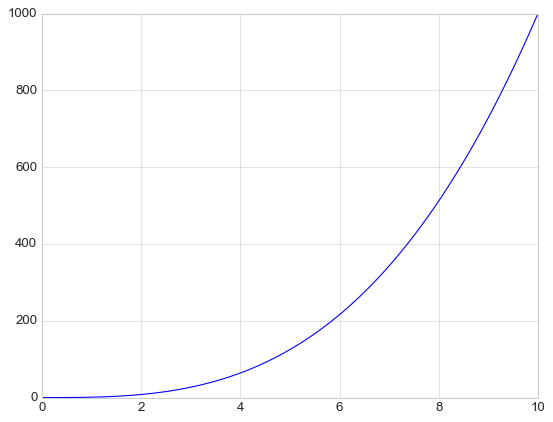

In [39]:
##OO API plot a line chart

fig, ax = plt.subplots()
ax.plot(x, x**3);

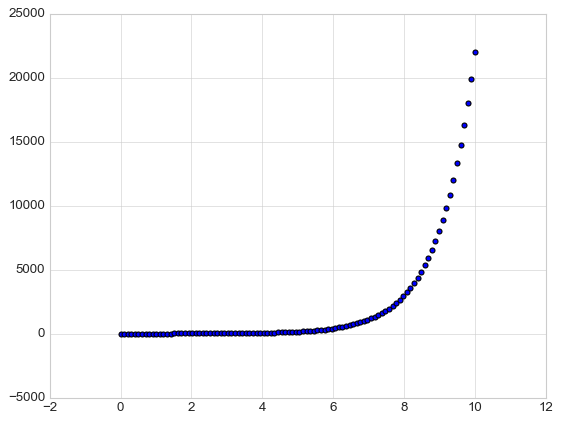

In [41]:
# Pyplot API
plt.scatter(x, np.exp(x));

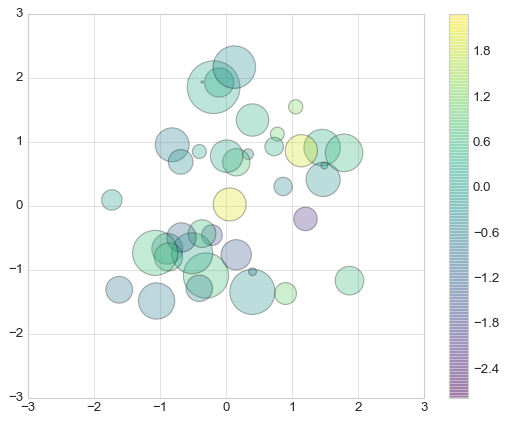

In [50]:
# OO API
# Prepare New Data
rng = np.random.RandomState(0)

x = rng.randn(100)
y = rng.randn(100)
colors = rng.randn(100)
sizes = 1000*rng.randn(100)

fig, ax = plt.subplots()
img1 = ax.scatter(x,y, s=sizes, c=colors, cmap='viridis', alpha=0.3);

fig.colorbar(img1)

### 3. Bar
* Vertical
* Horizontal

[Text(0.5, 1.0, "Bach Hoa Xanh's Soft Drink Prices"),
 Text(0, 0.5, 'Price ($)')]

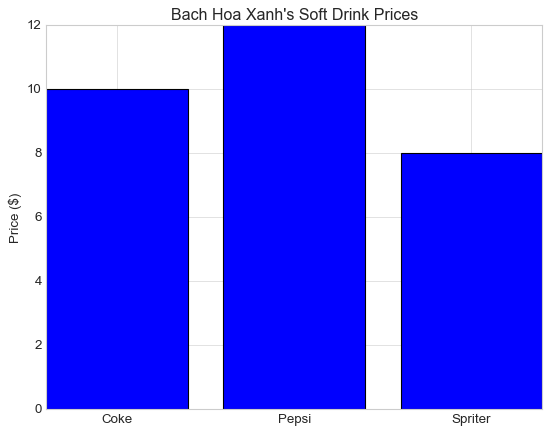

In [53]:
# Prepare Data from a python dictionary
soft_drink_prices = {"Coke":10,
                     "Pepsi":12,
                     "Spriter":8}

fig, ax = plt.subplots()
ax.bar(soft_drink_prices.keys(), soft_drink_prices.values());
ax.set(title="Bach Hoa Xanh's Soft Drink Prices", ylabel="Price ($)")

<BarContainer object of 3 artists>

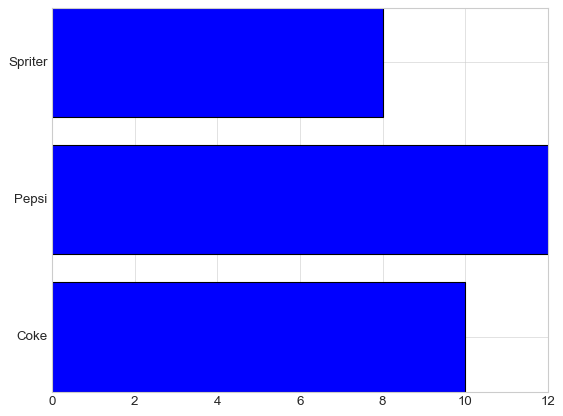

In [58]:
fig, ax = plt.subplots()
ax.barh(list(soft_drink_prices.keys()), list(soft_drink_prices.values()))




### 4.Histogram

In [65]:
# Prepare data
np.random.seed(42)
student_height = np.random.normal(170, 10, 250)


In [66]:
student_height[:10], len(student_height)

(array([174.96714153, 168.61735699, 176.47688538, 185.23029856,
        167.65846625, 167.65863043, 185.79212816, 177.67434729,
        165.30525614, 175.42560044]),
 250)

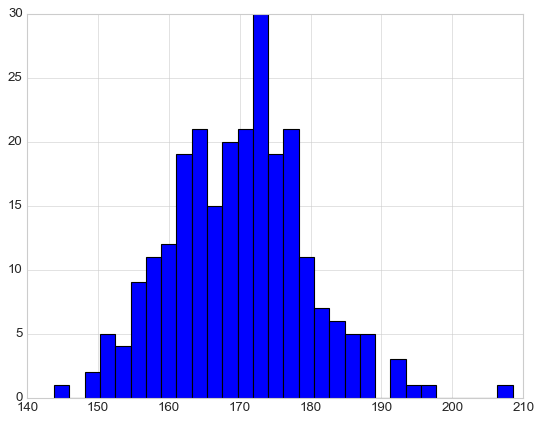

In [68]:
# pyplot API
plt.hist(student_height, bins=30);

### Subplots
* Multiple plots on one figure: 

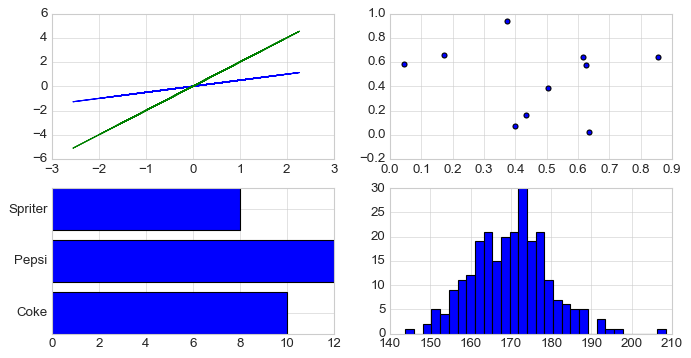

In [73]:
# Option 1:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, 
                                             ncols = 2, 
                                             figsize=(10,5))

# Plot Data to each axis
ax1.plot(x, x/2)
ax1.plot(x, x*2)

ax2.scatter(np.random.random(10), np.random.random(10))
ax3.barh(list(soft_drink_prices.keys()), 
        list(soft_drink_prices.values()))
ax4.hist(student_height, bins=30);

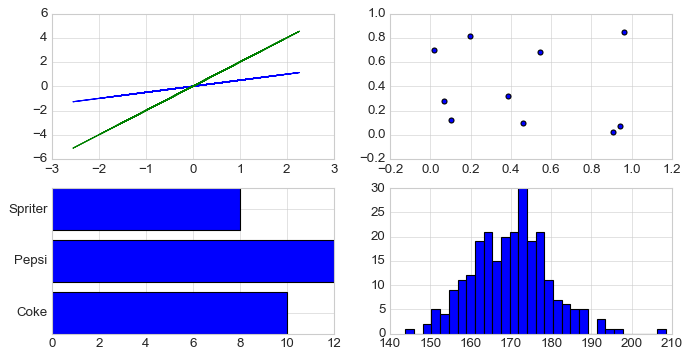

In [75]:
# Option 2:
fig, ax = plt.subplots(nrows=2, 
                       ncols=2, 
                       figsize=(10,5))
# Plot Data to each axis
ax[0,0].plot(x, x/2)
ax[0,0].plot(x, x*2)

ax[0,1].scatter(np.random.random(10), np.random.random(10))
ax[1,0].barh(list(soft_drink_prices.keys()), 
        list(soft_drink_prices.values()))
ax[1,1].hist(student_height, bins=30);


### Project: Data Visualization - California Cities

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [107]:
cities = pd.read_csv('california_cities.csv')
cities.head()
cities["area_total_km2"].sort_values(ascending=False) 

239    1302.000
367     964.510
55      527.401
375     466.109
26      371.946
         ...   
163         NaN
237         NaN
370         NaN
393         NaN
443         NaN
Name: area_total_km2, Length: 482, dtype: float64

Text(0.5, 1.0, 'California Cities: Population and Area Distribution')

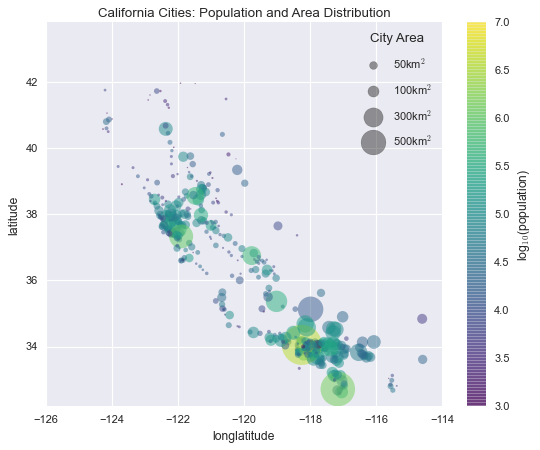

In [112]:
# Extract Latd = Vĩ độ and Longd = Kinh độ
lat, long = cities['latd'], cities['longd']

population, area = cities['population_total'], cities['area_total_km2']

plt.style.use('seaborn')
plt.figure(figsize=(8,6))
# Plot using Pyplot API
plt.scatter(lon, lat, 
            c=np.log10(population), 
            cmap='viridis',
            s=area, linewidths=0, alpha=0.5)
plt.axis('equal')
plt.xlabel("longlatitude")
plt.ylabel("latitude")
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3,7)

# Create a legend for cities's sizes
area_range = [50, 100, 300, 500]

for area in area_range:
    plt.scatter([],[], s=area, c='k', alpha=0.4,
                label=str(area)+'km$^2$')
plt.legend(labelspacing=1, title='City Area')
plt.title('California Cities: Population and Area Distribution')